In [394]:
# Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [395]:
# -----------------------------------
# Wczytanie danych 
# -----------------------------------

df = pd.read_csv('titanic.csv')

In [367]:

# -----------------------------------
# EDA - Podstawowe informacje
# -----------------------------------

print("Informacje o dataframie:")
df.info()
print("\nPierwsze rekordy:")
df.head()

Informacje o dataframie:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Pierwsze rekordy:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [396]:
print("\nStatystyki opisowe zmiennych numerycznych:")
print(df.describe())


Statystyki opisowe zmiennych numerycznych:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [397]:
print("\nRozkład zmiennej docelowej (Survived):")
print(df['Survived'].value_counts())


Rozkład zmiennej docelowej (Survived):
Survived
0    549
1    342
Name: count, dtype: int64


In [398]:
# Sprawdzenie braków danych
print("\nIlość braków w poszczególnych kolumnach:")
df.isnull().sum()


Ilość braków w poszczególnych kolumnach:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [371]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


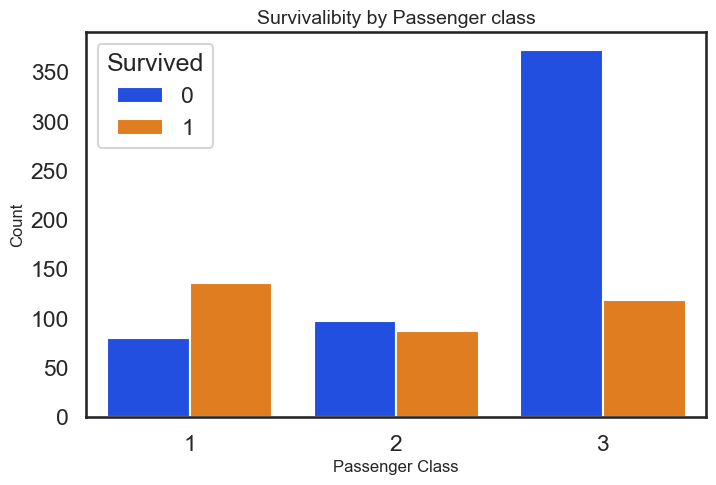

In [372]:
plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='Pclass', hue='Survived', palette='bright') 

plt.title('Survivalibity by Passenger class', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

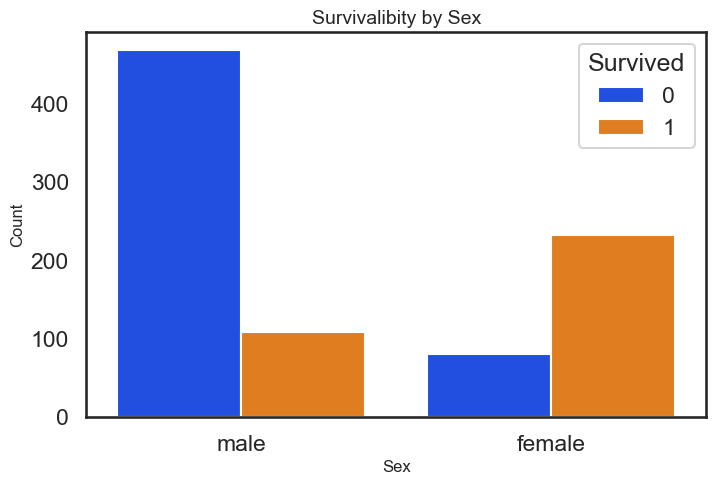

In [399]:
plt.figure(figsize=(8, 5)) 
sns.countplot(data=df, x='Sex', hue='Survived', palette='bright') 

plt.title('Survivalibity by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

C:\Users\Patryk\AppData\Local\Temp\ipykernel_15976\2144954913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', width=0.4)


Text(0.5, 1.0, 'Survivalibity by Age')

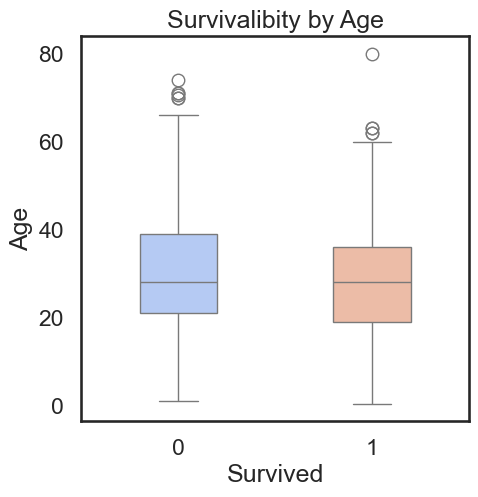

In [400]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x='Survived', y='Age', palette='coolwarm', width=0.4)
plt.title('Survivalibity by Age')

Text(0.5, 1.0, 'Correlation between numerical data')

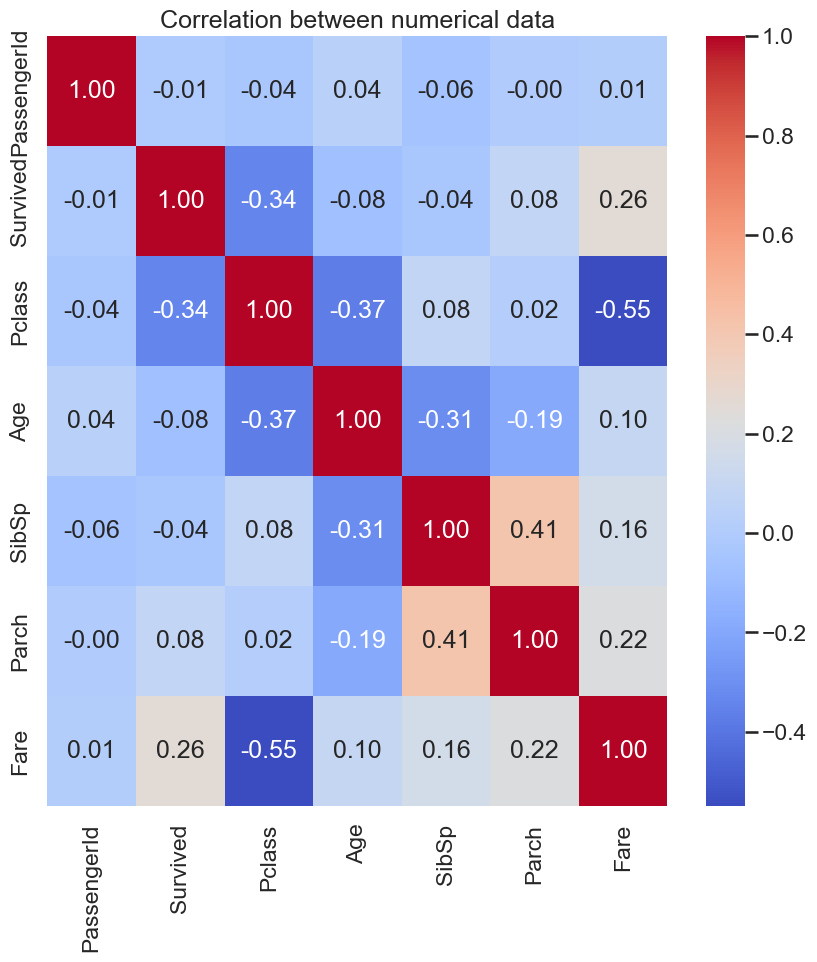

In [401]:
plt.figure(figsize=(10,10))
sns.set_style("white")
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between numerical data')

C:\Users\Patryk\AppData\Local\Temp\ipykernel_15976\1061846786.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='bright', width=0.4, ax=axes[1, 0])


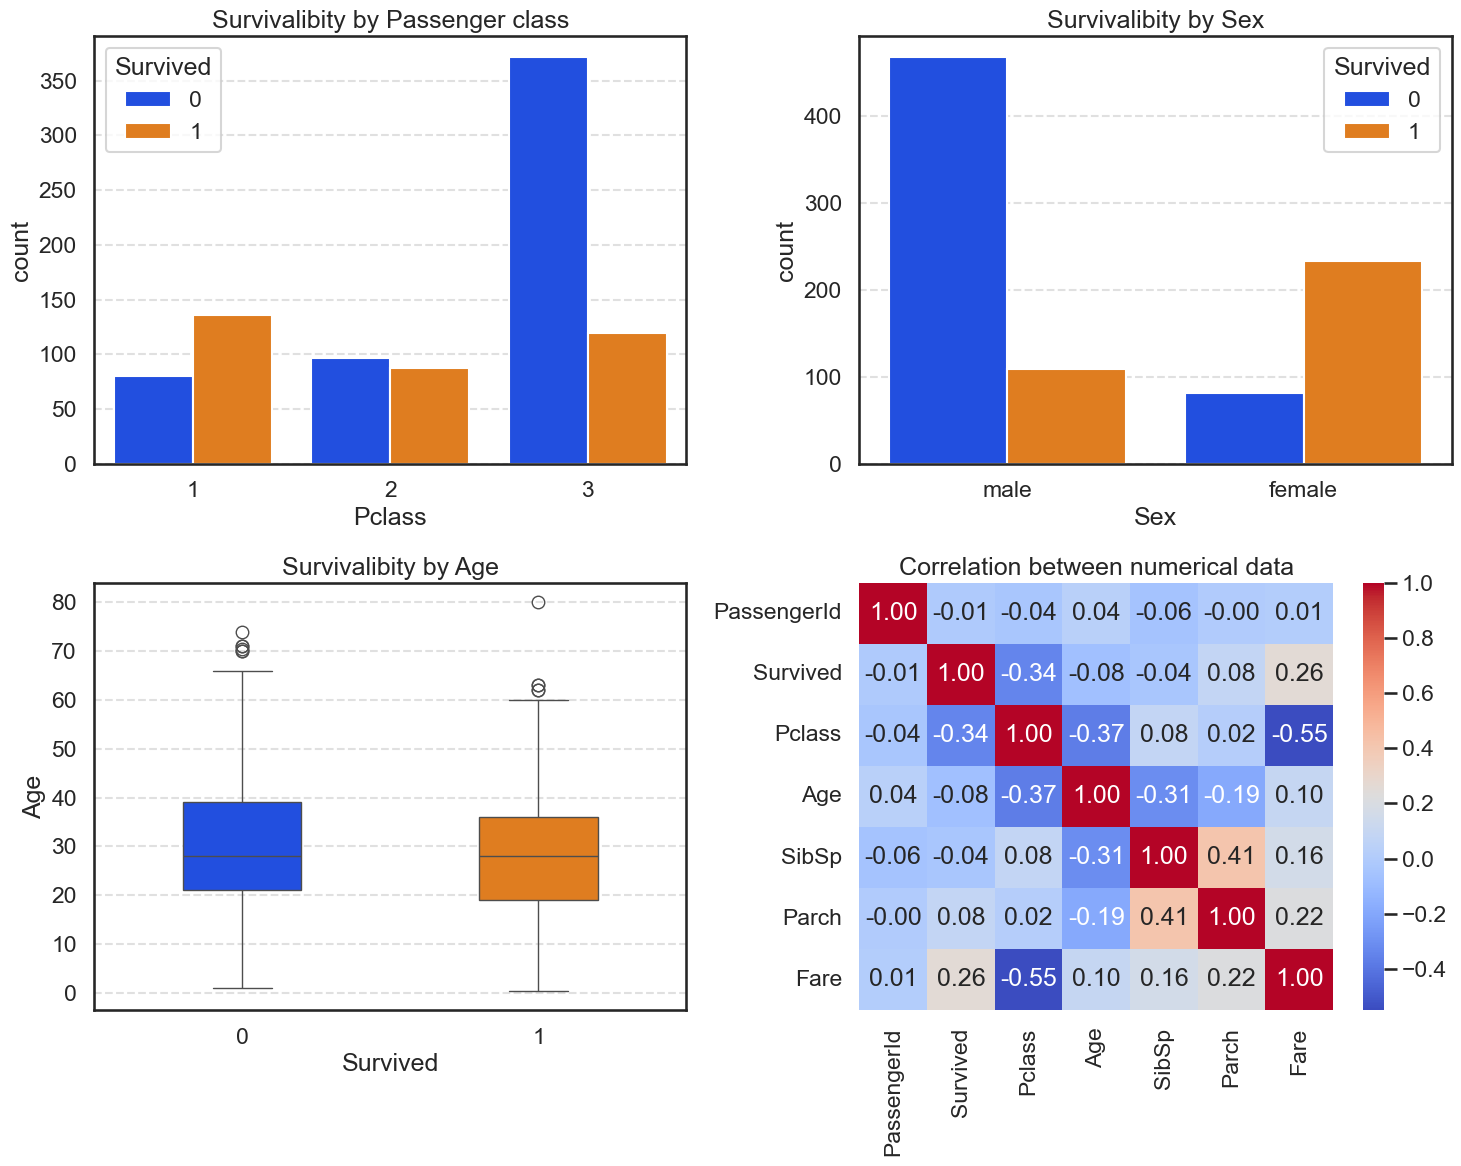

In [402]:
sns.set_context("talk")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.countplot(data=df, x='Pclass', hue='Survived', palette='bright', ax=axes[0, 0])
axes[0, 0].set_title('Survivalibity by Passenger class')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.countplot(data=df, x='Sex', hue='Survived', palette='bright', ax=axes[0, 1]) 
axes[0,1].set_title('Survivalibity by Sex')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.6)

sns.boxplot(data=df, x='Survived', y='Age', palette='bright', width=0.4, ax=axes[1, 0])
axes[1,0].set_title('Survivalibity by Age')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.6)

sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1,1])
axes[1, 1].set_title("Correlation between numerical data")

plt.tight_layout()
plt.show()

In [403]:
# -----------------------------------
# Przetwarzanie danych
# - Usuwamy dane niepotrzebne, nieinformatywne
# - Zakodujemy płeć i port zaokrętowania
# - Uzupełnimy braki w Age oraz Embarked
# -----------------------------------

# Usuwamy niepotrzebne kolumny: PassengerId, Name, Ticket, Cabin

df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
# One-hot Encoding dla płci

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [406]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
 8   Sex_male    891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True


In [407]:
df.isnull().sum() #sprawdzenie czy są braki w danych

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [408]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [410]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
331,1,45.500000,0,0,28.5000,False,True,True
733,2,23.000000,0,0,13.0000,False,True,True
382,3,32.000000,0,0,7.9250,False,True,True
704,3,26.000000,1,0,7.8542,False,True,True
813,3,6.000000,4,2,31.2750,False,True,False
...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,False,True,False
270,1,29.699118,0,0,31.0000,False,True,True
860,3,41.000000,2,0,14.1083,False,True,True
435,1,14.000000,1,2,120.0000,False,True,False


In [411]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [412]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

In [413]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [414]:
# Logistic Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [415]:
print("\nWyniki dla Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Wyniki dla Logistic Regression:
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [416]:
# KNN
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [417]:
print("\nWyniki dla KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Wyniki dla KNN:
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [418]:
# Porównanie accuracy obu modeli
print("\nPorównanie Accuracy:")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"KNN: {accuracy_score(y_test, y_pred_knn):.4f}")


Porównanie Accuracy:
Logistic Regression: 0.8101
KNN: 0.7989


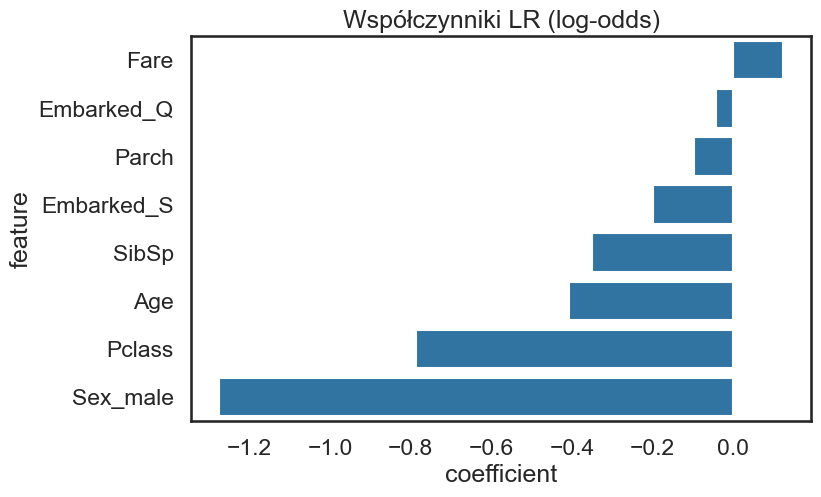

In [419]:
coefficients = lr_pipeline.named_steps['lr'].coef_[0]
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x='coefficient', y='feature', orient='h')
plt.title("Współczynniki LR (log-odds)")
plt.show()
